#  Newport LSH-7320 Solar Simulator IV sweep

#### V2 for both single sweep PV testing and multi-sweep degradation testing.
#### V3 Added: lamp intensity parameter; manual lamp control options;  mmp tracking

To prepare, check the following:

* Turn the Keithley 2401 meter on and plug the KUSB488 into the USB hub.
* Also plug the Labjack unit into the USB hub and the FIO4 output of the Labjack to the trigger of the LSH-7320.
* Plug the USB hub into your computer.  Make sure each USB channel is on and each device mounts.

Some specifics of the code:

* Use the OS commands below to navigate to the directory where you want to save the data.
* Put this script and the K2401SS.py library in the current working directory (cwd).
* If you are not sure what the cwd is, use ```os.getcwd()``` to find out. ```%pwd``` also returns the cwd.
* Run code block 5 below. A "\data_mmddyy" directory will be automatically created within the cwd.
* Run code block 7: ```Keithley = K2401SS.K2401(dll_dir=r'C:\WINDOWS\system32\visa64.dll')```
    * If the Keithley unit is found it returns: ```KEITHLEY INSTRUMENTS INC.,MODEL 2401,1370363,A01 Aug 25 2011 12:57:43/A02  /S/K```
* Run the code cells below the line "Re-run the cells below while changing the parameters as needed.".
* Change the sample name, cell number, etc. and re-run as needed.
* The data is automatically saved in .csv files and a plot generated/saved after each sweep. 
* A time code (HHMMSS) is appended to the sample name to avoid overwiting the data from the same sample and cell.
* A parameters file is created and added to for each "\data" folder.

Path and filename:
* The path to the data folder is ```path = os.getcwd() + "\data_" + today.strftime("%m%d%y")```
* There are three kinds of files associated with each scan. Their names are built from the sample name, the cell number, the scan direction ("F" or "R"), and the time (HHMMSS).  The parameters file name has the date appended (mmddyy).
* A special timeseries parameter file is created for timeseries scans, as described below.

Sample and cell parameters:
* ```samplename = "Silicon"``` Name of you sample.
* ```cellnumber = "1"```       Cell number (in string format).
* ```cellarea = 2.0*4.0```     Cell area or mask area in cm$^2$.

Voltage sweep parameters:
* ```startv = -0.1```         Sweep start voltage.
* ```stopv = 0.65```          Sweep stop voltage.
* ```stepv = 0.025```         Sweep step size.
* ```sweep_rate = "medium"``` slow=about 1.3 steps/s, medium=5 steps/s,fast=12 steps/s. Note that ```stepv``` also affects the sweep rate in mV/s.
* ```direction = "both"``` options are: ("forward", "reverse", and "both"). Selecting "both" results in four sweeps since dark and light sweeps are done in each direction. Selecting "forward" or "reverse" result in two sweeps, one dark and one light.

Single scan option:
* ```do_single_scan = True``` (True/False) Single scan takes priority. Set this option to ```False``` to run a timeseries.
* Set the other parameters in code block 9 as needed.
* Pro Tip: It may be more convenient to use "Restart & Run All" from the Kernel menu after updating the parameters instead of executing each cell individually.

Multiple sweeps for degradation testing:

* Set ```do_timeseries = True``` and ```do_single_scan = False```.
* Set the other parameters in code block 9 as needed.
* Use the companion script "IV_sweep_Timeseries_Monitor_V1.ipynb" to view a continually updated plot of the timeseries.
    * Make sure the ```path``` and ```filename``` variables are set correctly. 
    * The filname should have the form "timeseries_parameters_mmddyy". It will be automatically created by this script.

Timeseries loop options:
* ```do_timeseries = False```         (True/False) Set this option to ```True``` to run a time series.
* ```timeseries_interval = int(60)``` interval in seconds. (must be an integer)
* ```timeseries_duration = 1.0```     duration in hours. (float)

Saving and printing options:
* ```savedata = 'yes'```       ('yes'/'no') Saves the data and the plot to a file.
* ```saveparameters = 'yes'``` ('yes'/'no') Adds the parameters to the parameters file.
* ```verbose = 1```            (1/0) Prints a lot of extra stuff and shows the plot.



For Labjack code examples, consult the source code at https://github.com/labjack/LabJackPython/blob/master/src/u

###### V2 last updated 1/1/2022 RLH.

###### V3 New capabilities

Lamp intensity parameters:
* ```I_ph = 1.00```            (normally 0.80-1.00) Correct for lamp intensity and spectral mismatch factors. 

Lamp control:
* ```labjack = True```       (True/False) Set to True to control the lamp with the LabJack U3 device.
* ```do_dark_sweep = True``` (True/False) Set to True to enable dark sweeps. If False they will be skipped and the lamp will always be on.
* ```burnintime = 10```      (Time in sec.) Burn in time in seconds with the lamp on before the sweep starts. 
 
Maximum power point tracking:
* ```mpp_tracking_mode = True```   (True/False) Set to True to set the voltage to mpp_V after each sweep.
* ```mpp_default  = "0.3"```       (Must be a string)  Intial guess for the mpp voltage. [Volts] 

##### V3 last updated on 5/6/2023 RLH.

In [88]:
import os
from datetime import date, datetime
import time

In [89]:
%pwd

'C:\\Users\\LabUser\\OneDrive - Verde Technologies\\Documents\\data\\pramod'

In [90]:
# %cd '/home/rheadrick/Documents/PHYS202_2023/Group'
#%cd '/home/rheadrick/Documents/PHYS202_2023/GroupA'
#%cd '/home/rheadrick/Documents/Randy'
#%cd '/home/rheadrick/Documents/PHYS202_2023/GroupD'
#%cd "C:\Users\LabUser\Documents\randy"
#%cd '/home/rheadrick/Documents/Randy'
%cd "C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod"
#%cd "C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\Zen"
#%cd "C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\seid"
#%cd "C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\phys4100"

C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod


In [91]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 382C-13F4

 Directory of C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod

09/14/2023  01:44 PM    <DIR>          .
04/26/2024  12:31 PM    <DIR>          ..
09/14/2023  01:44 PM    <DIR>          09122023
09/14/2023  01:51 PM    <DIR>          09122023_091223
09/14/2023  01:51 PM    <DIR>          data_033123
               0 File(s)              0 bytes
               5 Dir(s)  140,912,226,304 bytes free


In [92]:
os.getcwd() 

'C:\\Users\\LabUser\\OneDrive - Verde Technologies\\Documents\\data\\pramod'

In [93]:
#today = date.today()
today = date(2024, 4, 15)
path = os.getcwd() + "_" +today.strftime("%m%d%y")
#path = os.getcwd() + "/data_" + today.strftime("%m%d%y")

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  # Create a new directory if it doesn't already exist 
    os.makedirs(path)
    base_t = time.time()  # save the base time when the directory is created
    f = open(path + "/basetime.dat", "w+")
    print("{:.9f}\n".format(base_t), file=f)
    f.close()
    print("The directory", path, " is created!")
    print("base_t for timeseries scans =" + str(base_t))
else:
    f = open(path + "/basetime.dat", "r")
    base_t = float(f.read(17))
    f.close()
    print("The directory", path, " already exists.")
    print("base_t for timeseries scans =" + str(base_t))

The directory C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod_041524  already exists.
base_t for timeseries scans =1714148106.095255


In [94]:
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.pyplot as plt
import sys
import K2401SS_MPP_4 # K2401 Solar Simulator package 4-wire
#import K2401SS_MPP_2 # K2401 Solar Simulator package 2-wire
from IPython.display import display
from tqdm import tqdm

In [95]:
dll_dir=r'C:\WINDOWS\system32\visa64.dll' # This is the default in case dll_dir is not specified.
#dll_dir=r'/usr/lib/x86_64-linux-gnu/libivivisa.so'  # For Ubuntu Linux
#dll_dir=r'C:\WINDOWS\system32\visa64.dll'            # For Windows

# Maximum power point tracking
mpp_tracking_mode_enable = True  # Set to True to set the voltage to mpp_V after each sweep.
mpp_default  = "0.9" # Must be a string.  Intial guess for the mpp.

if(mpp_tracking_mode_enable):
    Keithley = K2401SS_MPP_4.K2401(dll_dir=dll_dir, mpp_V=mpp_default)
else:
    Keithley = K2401SS_MPP_4.K2401(dll_dir=dll_dir)

K2401 setup:

Default Directory:  C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod

VISA library version:
   Resource Manager of Visa Library at C:\WINDOWS\system32\visa64.dll

Python version:
   3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]

List of instruments discovered:

Instrument  1 :  GPIB0::25::INSTR
  Interface type:  InterfaceType.gpib
  Interface board number:  0
  Resource class:  INSTR
  Resource name:  GPIB0::25::INSTR
  Resource alias:  None

Instrument  2 :  GPIB0::25::0::INSTR
  Interface type:  InterfaceType.gpib
  Interface board number:  0
  Resource class:  INSTR
  Resource name:  GPIB0::25::0::INSTR
  Resource alias:  None

 KEITHLEY INSTRUMENTS INC.,MODEL 2401,4118964,A01 Aug 25 2011 12:57:43/A02  /V/M



#### Re-run the cells below while changing the parameters as needed.

In [148]:
#####  Set all your parameters here. Excecute this code block to set the parameters. #####
#####  Then execute the cell below to run the scan.                                  #####
#
# Sample and cell parameters.
samplename = "SLA_Space_K"
cellnumber = "1"
cellarea = 5.15 # cm^2

# Voltage sweep parameters
startv = -0.25
stopv = 1.25 
stepv = 0.025
sweep_rate = "fast" # slow=about 1.3 steps/s, medium=5 steps/s,fast=12 steps/s (measured at 100 mV/step)
direction = "both" # options are: "forward", "reverse", and "both"

# Single scan option.  
do_single_scan = True #  Set to 'False' for mpp and timeseries modes. 'True' overrides both modes.

# timeseries loop options.
do_timeseries = False
timeseries_interval = int(50*60) # interval in seconds (must be an integer)
timeseries_duration = 200.0     # duration in hours

# Lamp control
labjack = True # Set to True to control the lamp with the LabJack U3 device.
do_dark_sweeps = True # Set to True to enable dark sweeps. If False they will be skipped.
burnintime = 3 # Burn in time in seconds with the lamp on before the sweep starts. 

# saving options, 
savedata = 'yes'       # ('yes'/'no') Saves the data and the plot to a file.
saveparameters = 'yes' # ('yes'/'no') Adds the parameters to the parameters file.
verbose = 1            # (1/0) Prints a lot of extra stuff and shows the plot.

# Lamp intensity parameters.
I_ph = 0.805 # 1.00            # Lamp intensity in suns.

# Check parameters to see if mpp tracking mode is on.
if(mpp_tracking_mode_enable and do_timeseries and not do_single_scan):
    mpp_tracking_mode = True
    print("mpp tracking mode is on!")
else:
    mpp_tracking_mode = False
    print("mpp tracking mode is off.")

mpp tracking mode is off.


LabJack U3 setup: 
{'FirmwareVersion': '1.46', 'BootloaderVersion': '0.27', 'HardwareVersion': '1.30', 'SerialNumber': 320096721, 'ProductID': 3, 'LocalID': 1, 'TimerCounterMask': 64, 'FIOAnalog': 15, 'FIODirection': 0, 'FIOState': 0, 'EIOAnalog': 0, 'EIODirection': 0, 'EIOState': 0, 'CIODirection': 0, 'CIOState': 0, 'DAC1Enable': 1, 'DAC0': 0, 'DAC1': 0, 'TimerClockConfig': 2, 'TimerClockDivisor': 256, 'CompatibilityOptions': 0, 'VersionInfo': 18, 'DeviceName': 'U3-HV'}
Starting IV scans:
set_lamp_state turned the lamp off
Lamp off
Sweep rate: 370.0 mV/sec
Switching the lamp state from off to on.
Lamp on
Sweep rate: 376.5 mV/sec
Switching the lamp state from on to off.
set_lamp_state turned the lamp off
Lamp off
Data collection is done!


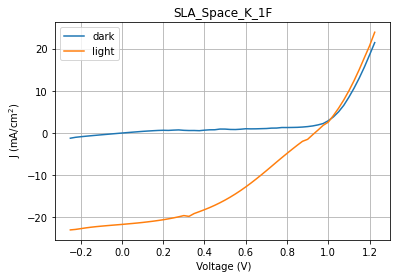

LabJack U3 setup: 
{'FirmwareVersion': '1.46', 'BootloaderVersion': '0.27', 'HardwareVersion': '1.30', 'SerialNumber': 320096721, 'ProductID': 3, 'LocalID': 1, 'TimerCounterMask': 64, 'FIOAnalog': 15, 'FIODirection': 0, 'FIOState': 0, 'EIOAnalog': 0, 'EIODirection': 0, 'EIOState': 0, 'CIODirection': 0, 'CIOState': 0, 'DAC1Enable': 1, 'DAC0': 0, 'DAC1': 0, 'TimerClockConfig': 2, 'TimerClockDivisor': 256, 'CompatibilityOptions': 0, 'VersionInfo': 18, 'DeviceName': 'U3-HV'}
Starting IV scans:
set_lamp_state turned the lamp off
Lamp off
Sweep rate: -339.0 mV/sec
Switching the lamp state from off to on.
Lamp on
Sweep rate: -375.7 mV/sec
Switching the lamp state from on to off.
set_lamp_state turned the lamp off
Lamp off
Data collection is done!


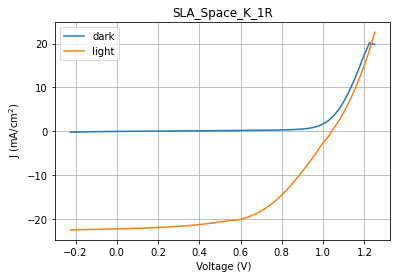

Data saved to: C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod_041524/SLA_Space_K_1F_130604.csv
Plot saved to: C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod_041524/SLA_Space_K_1F_130604.png
Data saved to: C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod_041524/SLA_Space_K_1R_130604.csv
Plot saved to: C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod_041524/SLA_Space_K_1R_130604.png
I_ph = 0.805 V
V_oc = 0.935 V
mpp = 0.525 V
J_sc = 21.726 mA/cm^2
R_sh = 227.4 Ω-cm^2
R_ser = 23.42 Ω-cm^2
FF = 0.394
PCE =  8.00%
Appended parameters to: C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod_041524/parameters_041524
I_ph = 0.805 V
V_oc = 1.042 V
mpp = 0.700 V
J_sc = 22.327 mA/cm^2
R_sh = 877.8 Ω-cm^2
R_ser = 13.67 Ω-cm^2
FF = 0.549
PCE = 12.78%
Appended parameters to: C:\Users\LabUser\OneDrive - Verde Technologies\Documents\data\pramod_041524/parameters_041524

Sweep 1 of 1 is complete!
Elapsed

In [149]:
########################## This is the main script. ###################################################
########################## Double check your parameters before you run it! ############################
########################## Also make sure the Keithley unit was discovered and it is responding.#######
#######################################################################################################
#
# Single scan includes dark and light sweeps, and may also include both forward and reverse sweeps.
# Single scan has priority over timeseries.
if (do_single_scan == True):
    numscans = 1
elif (do_timeseries == True):
    numscans = int(np.ceil(3600*timeseries_duration/timeseries_interval)) + 1
    print("numscans = ", numscans)
else:
    numscans = 0
#
# The main loop starts here.
#
for myint in range(numscans):
    # do the scan
    if(direction == "reverse"):
        fig_R, df_R = Keithley.dark_light_IVsweep(stopv, startv, -stepv, rate=sweep_rate, 
                                          area=cellarea, plottitle=samplename+"_"+cellnumber+"R", 
                                                  verbose=verbose, labjack=labjack, burnintime=burnintime,
                                                  do_dark=do_dark_sweeps, mpp_tracking_mode=mpp_tracking_mode)
    elif (direction == "both"):
        fig_F, df_F = Keithley.dark_light_IVsweep(startv, stopv, stepv, rate=sweep_rate, 
                                          area=cellarea, plottitle=samplename+"_"+cellnumber+"F", 
                                                  verbose=verbose, labjack=labjack, burnintime=burnintime,
                                                  do_dark=do_dark_sweeps, mpp_tracking_mode=mpp_tracking_mode)
        fig_R, df_R = Keithley.dark_light_IVsweep(stopv, startv, -stepv, rate=sweep_rate, 
                                          area=cellarea, plottitle=samplename+"_"+cellnumber+"R", 
                                                  verbose=verbose, labjack=labjack, burnintime=burnintime,
                                                  do_dark=do_dark_sweeps, mpp_tracking_mode=mpp_tracking_mode)
    else:
        fig_F, df_F = Keithley.dark_light_IVsweep(startv, stopv, stepv, rate=sweep_rate, 
                                          area=cellarea, plottitle=samplename+"_"+cellnumber+"F", 
                                                  verbose=verbose, labjack=labjack, burnintime=burnintime,
                                                  do_dark=do_dark_sweeps, mpp_tracking_mode=mpp_tracking_mode)
   
    # record the current time
    timenow = datetime.now()
    timenowstr = timenow.strftime("%H%M%S")    
    datetodaystr = today.strftime("%m%d%y")
    # Save the data
    if (savedata != 'no'):
        if(direction == "reverse"):
            Keithley.save_data_and_plot(df_R, fig_R, path = path, samplename = samplename, 
                                        cellnumber = cellnumber+"R", timenowstr = timenowstr)
        elif (direction == "both"):
            Keithley.save_data_and_plot(df_F, fig_F, path = path, samplename = samplename, 
                                    cellnumber = cellnumber+"F", timenowstr = timenowstr)
            Keithley.save_data_and_plot(df_R, fig_R, path = path, samplename = samplename, 
                                        cellnumber = cellnumber+"R", timenowstr = timenowstr)
        else:
            Keithley.save_data_and_plot(df_F, fig_F, path = path, samplename = samplename, 
                                    cellnumber = cellnumber+"F", timenowstr = timenowstr)
    else:
        print("Data NOT saved.")
        
    ####  Calculate and save the PV parameters.
    # Calculate V_OC, J_SC, R_Sh, R_Ser, FF, PCE and save them to a common "parameters" file.
    if(direction == "reverse"):
        par_df_new_R = Keithley.calc_and_save_parameters(df_R,  path = path, 
                                samplename = samplename, cellnumber = cellnumber+"R", 
                                timenowstr = timenowstr, datetodaystr = datetodaystr,
                                saveparameters = saveparameters, verbose=verbose,
                                timeseries = do_timeseries, base_t = base_t, I_ph = I_ph, 
                                mpp_tracking_mode=mpp_tracking_mode) 
    elif (direction == "both"):
        par_df_new_F = Keithley.calc_and_save_parameters(df_F,  path = path, 
                                samplename = samplename, cellnumber = cellnumber+"F", 
                                timenowstr = timenowstr, datetodaystr = datetodaystr,
                                saveparameters = saveparameters, verbose=verbose,                         
                                timeseries = do_timeseries, base_t = base_t, I_ph = I_ph,
                                mpp_tracking_mode=mpp_tracking_mode) 
        par_df_new_R = Keithley.calc_and_save_parameters(df_R,  path = path, 
                                samplename = samplename, cellnumber = cellnumber+"R", 
                                timenowstr = timenowstr, datetodaystr = datetodaystr,
                                saveparameters = saveparameters, verbose=verbose,                      
                                timeseries = do_timeseries, base_t = base_t, I_ph = I_ph,
                                mpp_tracking_mode=mpp_tracking_mode) 
    else:
        par_df_new_F = Keithley.calc_and_save_parameters(df_F,  path = path, 
                                samplename = samplename, cellnumber = cellnumber+"F", 
                                timenowstr = timenowstr, datetodaystr = datetodaystr,
                                saveparameters = saveparameters, verbose=verbose, 
                                timeseries = do_timeseries, base_t = base_t, I_ph = I_ph,
                                mpp_tracking_mode=mpp_tracking_mode) 
    
    # Delay before the next sweep.
    # tqdm displays a progress bar during the sleep time.
    print(f"\nSweep {(myint+1)} of {numscans} is complete!")
    print("Elapsed time: {:.1f}\n".format(time.time()-base_t))
    if (myint < (numscans-1)):
        for i in tqdm(range(timeseries_interval)):
            time.sleep(0.99)

####  You can still view the results if you ran the scan with verbose=0. Use the code block below.

Note: This will only display result for the last scan done.

In [ ]:
# Display the single scan results or for the last scan of a timeseries.
if (True):
    if(direction == "reverse"):
        print("\n", par_df_new_R)
        display(fig_R)
    elif (direction == "both"):
        print("\n", par_df_new_F)
        print("\n", par_df_new_R)
        display(fig_F)
        display(fig_R)
    else:
        print("\n", par_df_new_F)
        display(fig_F)